In [1]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


data shows various values along the columns ,some column contains NAN values ,lets will deal with it in further steps

In [3]:
data['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [4]:
data['RainTomorrow'].isna().sum()

239

In [5]:
data['Evaporation'].unique()

array([  nan,   8.6,   3.8,   2.8,   3.2,   6.8,   4.2,   1.6,   4.4,
         4. ,   2.2,   3.4,   6.4,   4.6,   3.6,   4.8,   3. ,   1.2,
         1.4,   2.6,   1. ,   2. ,   8.4,   2.4,   0.6,   5.4,   1.8,
         7. ,   0.8,   0.2,   5.2,   5. ,   6. ,   7.6,   5.8,   5.6,
         8. ,   6.2,   6.6,   7.8,   8.8,   7.4,   9.4,   7.2,   0.4,
         0. ,  18. ,  24.2,  14.6,  19.4,  10.8,  28. ,  11.8,  24.6,
        11.2,  22.6,  10. ,  37. ,  26. ,  11. ,  19.8,  24.4,  10.6,
        27.4,  12. ,  11.6,  24. ,   9. ,  23. ,  29.2,  20.6,  13.2,
        22.8,   9.8,  16. ,  20. ,  10.4,   9.6,  12.2,  15.4,  18.4,
        24.8,  20.8,  32. ,  55.4,  17.8,  16.2,  14.2,  59.2,  33.8,
        10.2, 145. ,  16.6,  47. ,  15.2,  15.8,  12.6,  11.4,   9.2,
        14.8,  13. ,   8.2,  13.6,  12.8,  12.4,  17.6,  19.2,  13.8,
        22.4,  18.6,  13.4,  17. ,  14. ,  14.4,  15. ,  15.6,   0.7])

In [6]:
data['Sunshine'].isnull().sum().sum()

3994

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

we see that some of column having float type data it is necessary to convert it into int in further steps lets will do data encoding 

# DATA ENCODING

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()
label=le.fit_transform(data["Date"])
label
data=data.drop("Date",axis='columns')
data["Date"]=label


In [10]:
le=LabelEncoder()
label=le.fit_transform(data["Location"])
label
data=data.drop("Location",axis='columns')
data["Location"]=label


In [11]:
le=LabelEncoder()
label=le.fit_transform(data["WindGustDir"])
label
data=data.drop("WindGustDir",axis='columns')
data["WindGustDir"]=label


In [12]:
le=LabelEncoder()
label=le.fit_transform(data["WindDir9am"])
label
data=data.drop("WindDir9am",axis='columns')
data["WindDir9am"]=label


In [13]:
le=LabelEncoder()
label=le.fit_transform(data["WindDir3pm"])
label
data=data.drop("WindDir3pm",axis='columns')
data["WindDir3pm"]=label



In [14]:
le=LabelEncoder()
label=le.fit_transform(data["WindDir3pm"])
label
data=data.drop("WindDir3pm",axis='columns')
data["WindDir3pm"]=label


In [15]:
le=LabelEncoder()
label=le.fit_transform(data["RainToday"])
label
data=data.drop("RainToday",axis='columns')
data["RainToday"]=label


In [16]:
le=LabelEncoder()
label=le.fit_transform(data["RainTomorrow"])
label
data=data.drop("RainTomorrow",axis='columns')
data["RainTomorrow"]=label
data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Cloud3pm,Temp9am,Temp3pm,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,...,NaN,16.9,21.8,0,1,13,13,14,0,0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,...,NaN,17.2,24.3,1,1,14,6,15,0,0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,...,2.0,21.0,23.2,2,1,15,13,15,0,0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,...,NaN,18.1,26.5,3,1,4,9,0,0,0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,...,8.0,17.8,29.7,4,1,13,1,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,...,NaN,10.1,22.4,2999,9,0,9,1,0,0
8421,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,...,NaN,10.9,24.5,3000,9,6,9,3,0,0
8422,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,...,NaN,12.5,26.1,3001,9,3,9,14,0,0
8423,7.8,27.0,0.0,NaN,NaN,28.0,13.0,7.0,51.0,24.0,...,2.0,15.1,26.0,3002,9,9,10,3,0,0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        8350 non-null   float64
 1   MaxTemp        8365 non-null   float64
 2   Rainfall       8185 non-null   float64
 3   Evaporation    4913 non-null   float64
 4   Sunshine       4431 non-null   float64
 5   WindGustSpeed  7434 non-null   float64
 6   WindSpeed9am   8349 non-null   float64
 7   WindSpeed3pm   8318 non-null   float64
 8   Humidity9am    8366 non-null   float64
 9   Humidity3pm    8323 non-null   float64
 10  Pressure9am    7116 non-null   float64
 11  Pressure3pm    7113 non-null   float64
 12  Cloud9am       6004 non-null   float64
 13  Cloud3pm       5970 non-null   float64
 14  Temp9am        8369 non-null   float64
 15  Temp3pm        8329 non-null   float64
 16  Date           8425 non-null   int32  
 17  Location       8425 non-null   int32  
 18  WindGust

so data now are in int and float form

In [18]:
data.shape

(8425, 23)

In [19]:
data.isnull().sum()

MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustSpeed     991
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
Date                0
Location            0
WindGustDir         0
WindDir9am          0
WindDir3pm          0
RainToday           0
RainTomorrow        0
dtype: int64

data contains some null values it is necessary to remove that null values

In [20]:
import seaborn as sns

In [21]:
data['RainToday'].isna().sum()

0

# visualization

In [22]:
data_nominal=data[['RainToday','RainTomorrow']].copy()

0    6195
1    1990
2     240
Name: RainToday, dtype: int64


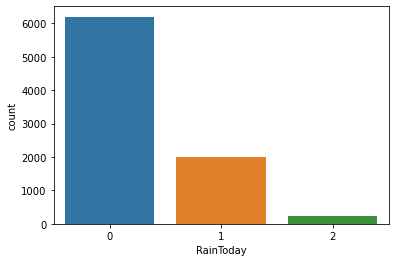

In [23]:
ax=sns.countplot(x='RainToday',data=data_nominal)
print(data_nominal['RainToday'].value_counts())

0    6195
1    1991
2     239
Name: RainTomorrow, dtype: int64


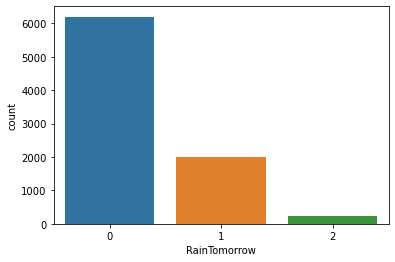

In [24]:
ax=sns.countplot(x='RainTomorrow',data=data_nominal)
print(data_nominal['RainTomorrow'].value_counts())

In [25]:
data_visualization=data[['RainToday','RainTomorrow']].copy()

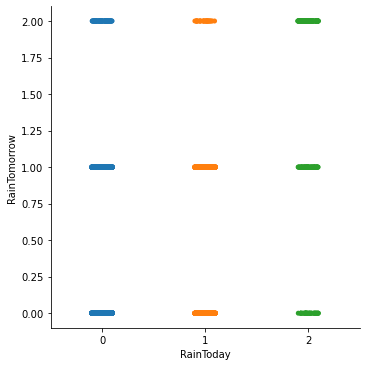

In [26]:
sns.catplot(x='RainToday',y='RainTomorrow',data=data)

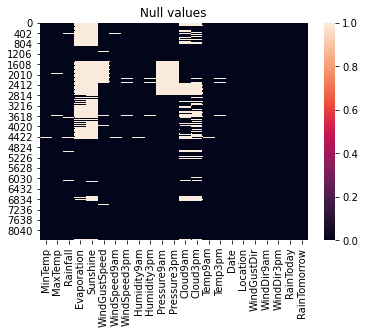

In [27]:
sns.heatmap(data.isnull())
plt.title("Null values")
plt.show()

it shows that some column contains lot of null values

handling the NULL values

In [28]:
mean_MinTemp=np.mean(data['MinTemp'])
data['MinTemp']=data['MinTemp'].fillna(mean_MinTemp)

In [29]:
mean_MaxTemp=np.mean(data['MaxTemp'])
data['MaxTemp']=data['MaxTemp'].fillna(mean_MaxTemp)

In [30]:
mean_Rainfall=np.mean(data['Rainfall'])
data['Rainfall']=data['Rainfall'].fillna(mean_Rainfall)

In [31]:
mean_Evaporation=np.mean(data['Evaporation'])
data['Evaporation']=data['Evaporation'].fillna(mean_Evaporation)

In [32]:
mean_Sunshine=np.mean(data['Sunshine'])
data['Sunshine']=data['Sunshine'].fillna(mean_Sunshine)

In [33]:
mean_WindGustSpeed=np.mean(data['WindGustSpeed'])
data['WindGustSpeed']=data['WindGustSpeed'].fillna(mean_WindGustSpeed)

In [34]:
mean_WindSpeed9am=np.mean(data['WindSpeed9am'])
data['WindSpeed9am']=data['WindSpeed9am'].fillna(mean_WindSpeed9am)

In [35]:
mean_WindSpeed3pm=np.mean(data['WindSpeed3pm'])
data['WindSpeed3pm']=data['WindSpeed3pm'].fillna(mean_WindSpeed3pm)

In [36]:
mean_Humidity9am=np.mean(data['Humidity9am'])
data['Humidity9am']=data['Humidity9am'].fillna(mean_Humidity9am)

In [37]:
mean_Humidity3pm=np.mean(data['Humidity3pm'])
data['Humidity3pm']=data['Humidity3pm'].fillna(mean_Humidity3pm)

In [38]:
mean_Pressure9am=np.mean(data['Pressure9am'])
data['Pressure9am']=data['Pressure9am'].fillna(mean_Pressure9am)

In [39]:
mean_Pressure3pm=np.mean(data['Pressure3pm'])
data['Pressure3pm']=data['Pressure3pm'].fillna(mean_Pressure3pm)

In [40]:
mean_Cloud9am=np.mean(data['Cloud9am'])
data['Cloud9am']=data['Cloud9am'].fillna(mean_Cloud9am)

In [41]:
mean_Cloud3pm=np.mean(data['Cloud3pm'])
data['Cloud3pm']=data['Cloud3pm'].fillna(mean_Cloud3pm)

In [42]:
mean_Temp9am=np.mean(data['Temp9am'])
data['Temp9am']=data['Temp9am'].fillna(mean_Temp9am)

In [43]:
mean_Temp3pm=np.mean(data['Temp3pm'])
data['Temp3pm']=data['Temp3pm'].fillna(mean_Temp3pm)

In [44]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Cloud3pm,Temp9am,Temp3pm,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,...,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,...,4.503183,17.762015,22.442934,1296.570564,5.793591,8.746944,8.546588,8.066350,0.293175,0.293056
std,5.379488,6.114516,10.309308,3.852004,2.825451,13.776101,10.128579,9.704759,16.774231,18.311894,...,2.299419,5.608301,5.945849,854.249434,3.162654,5.172665,5.012591,4.686287,0.514031,0.513752
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,...,0.000000,1.900000,7.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.300000,19.300000,0.000000,4.000000,7.632205,31.000000,6.000000,11.000000,56.000000,39.000000,...,3.000000,13.800000,18.100000,589.000000,3.000000,4.000000,4.000000,4.000000,0.000000,0.000000
50%,13.200000,23.300000,0.000000,5.389395,7.632205,40.174469,13.000000,19.000000,68.000000,51.000000,...,4.503183,17.762015,22.000000,1088.000000,6.000000,9.000000,9.000000,8.000000,0.000000,0.000000
75%,17.300000,28.000000,1.400000,5.389395,8.900000,48.000000,20.000000,24.000000,80.000000,63.000000,...,7.000000,21.900000,26.300000,2021.000000,8.000000,13.000000,13.000000,12.000000,1.000000,1.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,...,8.000000,39.400000,44.100000,3003.000000,11.000000,16.000000,16.000000,16.000000,2.000000,2.000000


table shows the total count ,mean std of various column data with data percentage,some column contain zero values so lets we replace it with mean of that perticular column 

In [76]:
#replacing the zero values with the mean of the column
data['Rainfall']=data['Rainfall'].replace(0,data['Rainfall'].mean())
data['Evaporation']=data['Evaporation'].replace(0,data['Evaporation'].mean())
data['Sunshine']=data['Sunshine'].replace(0,data['Sunshine'].mean())
data['WindSpeed9am']=data['WindSpeed9am'].replace(0,data['WindSpeed9am'].mean())
data['WindSpeed3pm']=data['WindSpeed3pm'].replace(0,data['WindSpeed3pm'].mean())
data['Cloud3pm']=data['Cloud3pm'].replace(0,data['Cloud3pm'].mean())
data['Date']=data['Date'].replace(0,data['Date'].mean())
data['Location']=data['Location'].replace(0,data['Location'].mean())
data['WindGustDir']=data['WindGustDir'].replace(0,data['WindGustDir'].mean())
data['WindDir9am']=data['WindDir9am'].replace(0,data['WindDir9am'].mean())
data['WindDir3pm']=data['WindDir3pm'].replace(0,data['WindDir3pm'].mean())
data['RainToday']=data['RainToday'].replace(0,data['RainToday'].mean())


In [78]:
data.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Cloud3pm,Temp9am,Temp3pm,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
MinTemp,1.000000,0.718316,0.097687,0.362257,0.084653,0.230323,0.090430,0.180074,-0.124932,0.096409,...,0.028945,0.889619,0.687045,-0.002785,0.091953,-0.118177,-0.131493,-0.153894,0.070083,0.099354
MaxTemp,0.718316,1.000000,-0.073412,0.459696,0.373785,0.138501,-0.021885,0.078350,-0.383260,-0.406872,...,-0.226720,0.863578,0.974834,0.088015,0.034651,-0.149318,-0.220729,-0.181414,-0.222613,-0.149216
Rainfall,0.097687,-0.073412,1.000000,-0.046912,-0.082199,0.091571,0.064608,0.046355,0.210824,0.217478,...,0.118859,0.008166,-0.081232,-0.001080,0.012198,0.044004,0.069617,0.050907,0.551708,0.229025
Evaporation,0.362257,0.459696,-0.046912,1.000000,0.367381,0.197080,0.152473,0.115116,-0.324335,-0.231214,...,-0.112472,0.428460,0.446372,0.118532,0.125827,-0.001293,-0.054137,0.002626,-0.167789,-0.089970
Sunshine,0.084653,0.373785,-0.082199,0.367381,1.000000,0.005767,-0.006085,0.039365,-0.356126,-0.394748,...,-0.486393,0.270203,0.390975,0.030689,0.031394,-0.049727,-0.059012,-0.057689,-0.205293,-0.308310
WindGustSpeed,0.230323,0.138501,0.091571,0.197080,0.005767,1.000000,0.559491,0.642261,-0.265449,-0.082415,...,0.086856,0.201789,0.102887,-0.032017,0.253229,0.056711,-0.167416,0.069250,0.085342,0.184282
WindSpeed9am,0.090430,-0.021885,0.064608,0.152473,-0.006085,0.559491,1.000000,0.473932,-0.283544,-0.085852,...,0.076677,0.046512,-0.032098,-0.043071,0.232131,-0.038689,-0.035188,0.051737,0.058279,0.056558
WindSpeed3pm,0.180074,0.078350,0.046355,0.115116,0.039365,0.642261,0.473932,1.000000,-0.213544,-0.042870,...,0.029292,0.179864,0.052894,-0.041259,0.243239,-0.016450,-0.135709,0.087965,0.042567,0.050442
Humidity9am,-0.124932,-0.383260,0.210824,-0.324335,-0.356126,-0.265449,-0.283544,-0.213544,1.000000,0.627257,...,0.242372,-0.368884,-0.375995,0.098950,-0.017552,0.049477,0.177752,-0.001329,0.365463,0.279329
Humidity3pm,0.096409,-0.406872,0.217478,-0.231214,-0.394748,-0.082415,-0.085852,-0.042870,0.627257,1.000000,...,0.387956,-0.109942,-0.476506,-0.035997,0.047339,0.040103,0.133314,-0.004054,0.349674,0.463922


# Heatmap

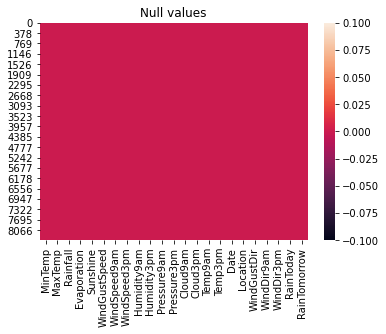

In [79]:
sns.heatmap(data.isnull())
plt.title("Null values")
plt.show()

all the null values are removed now

<AxesSubplot:>

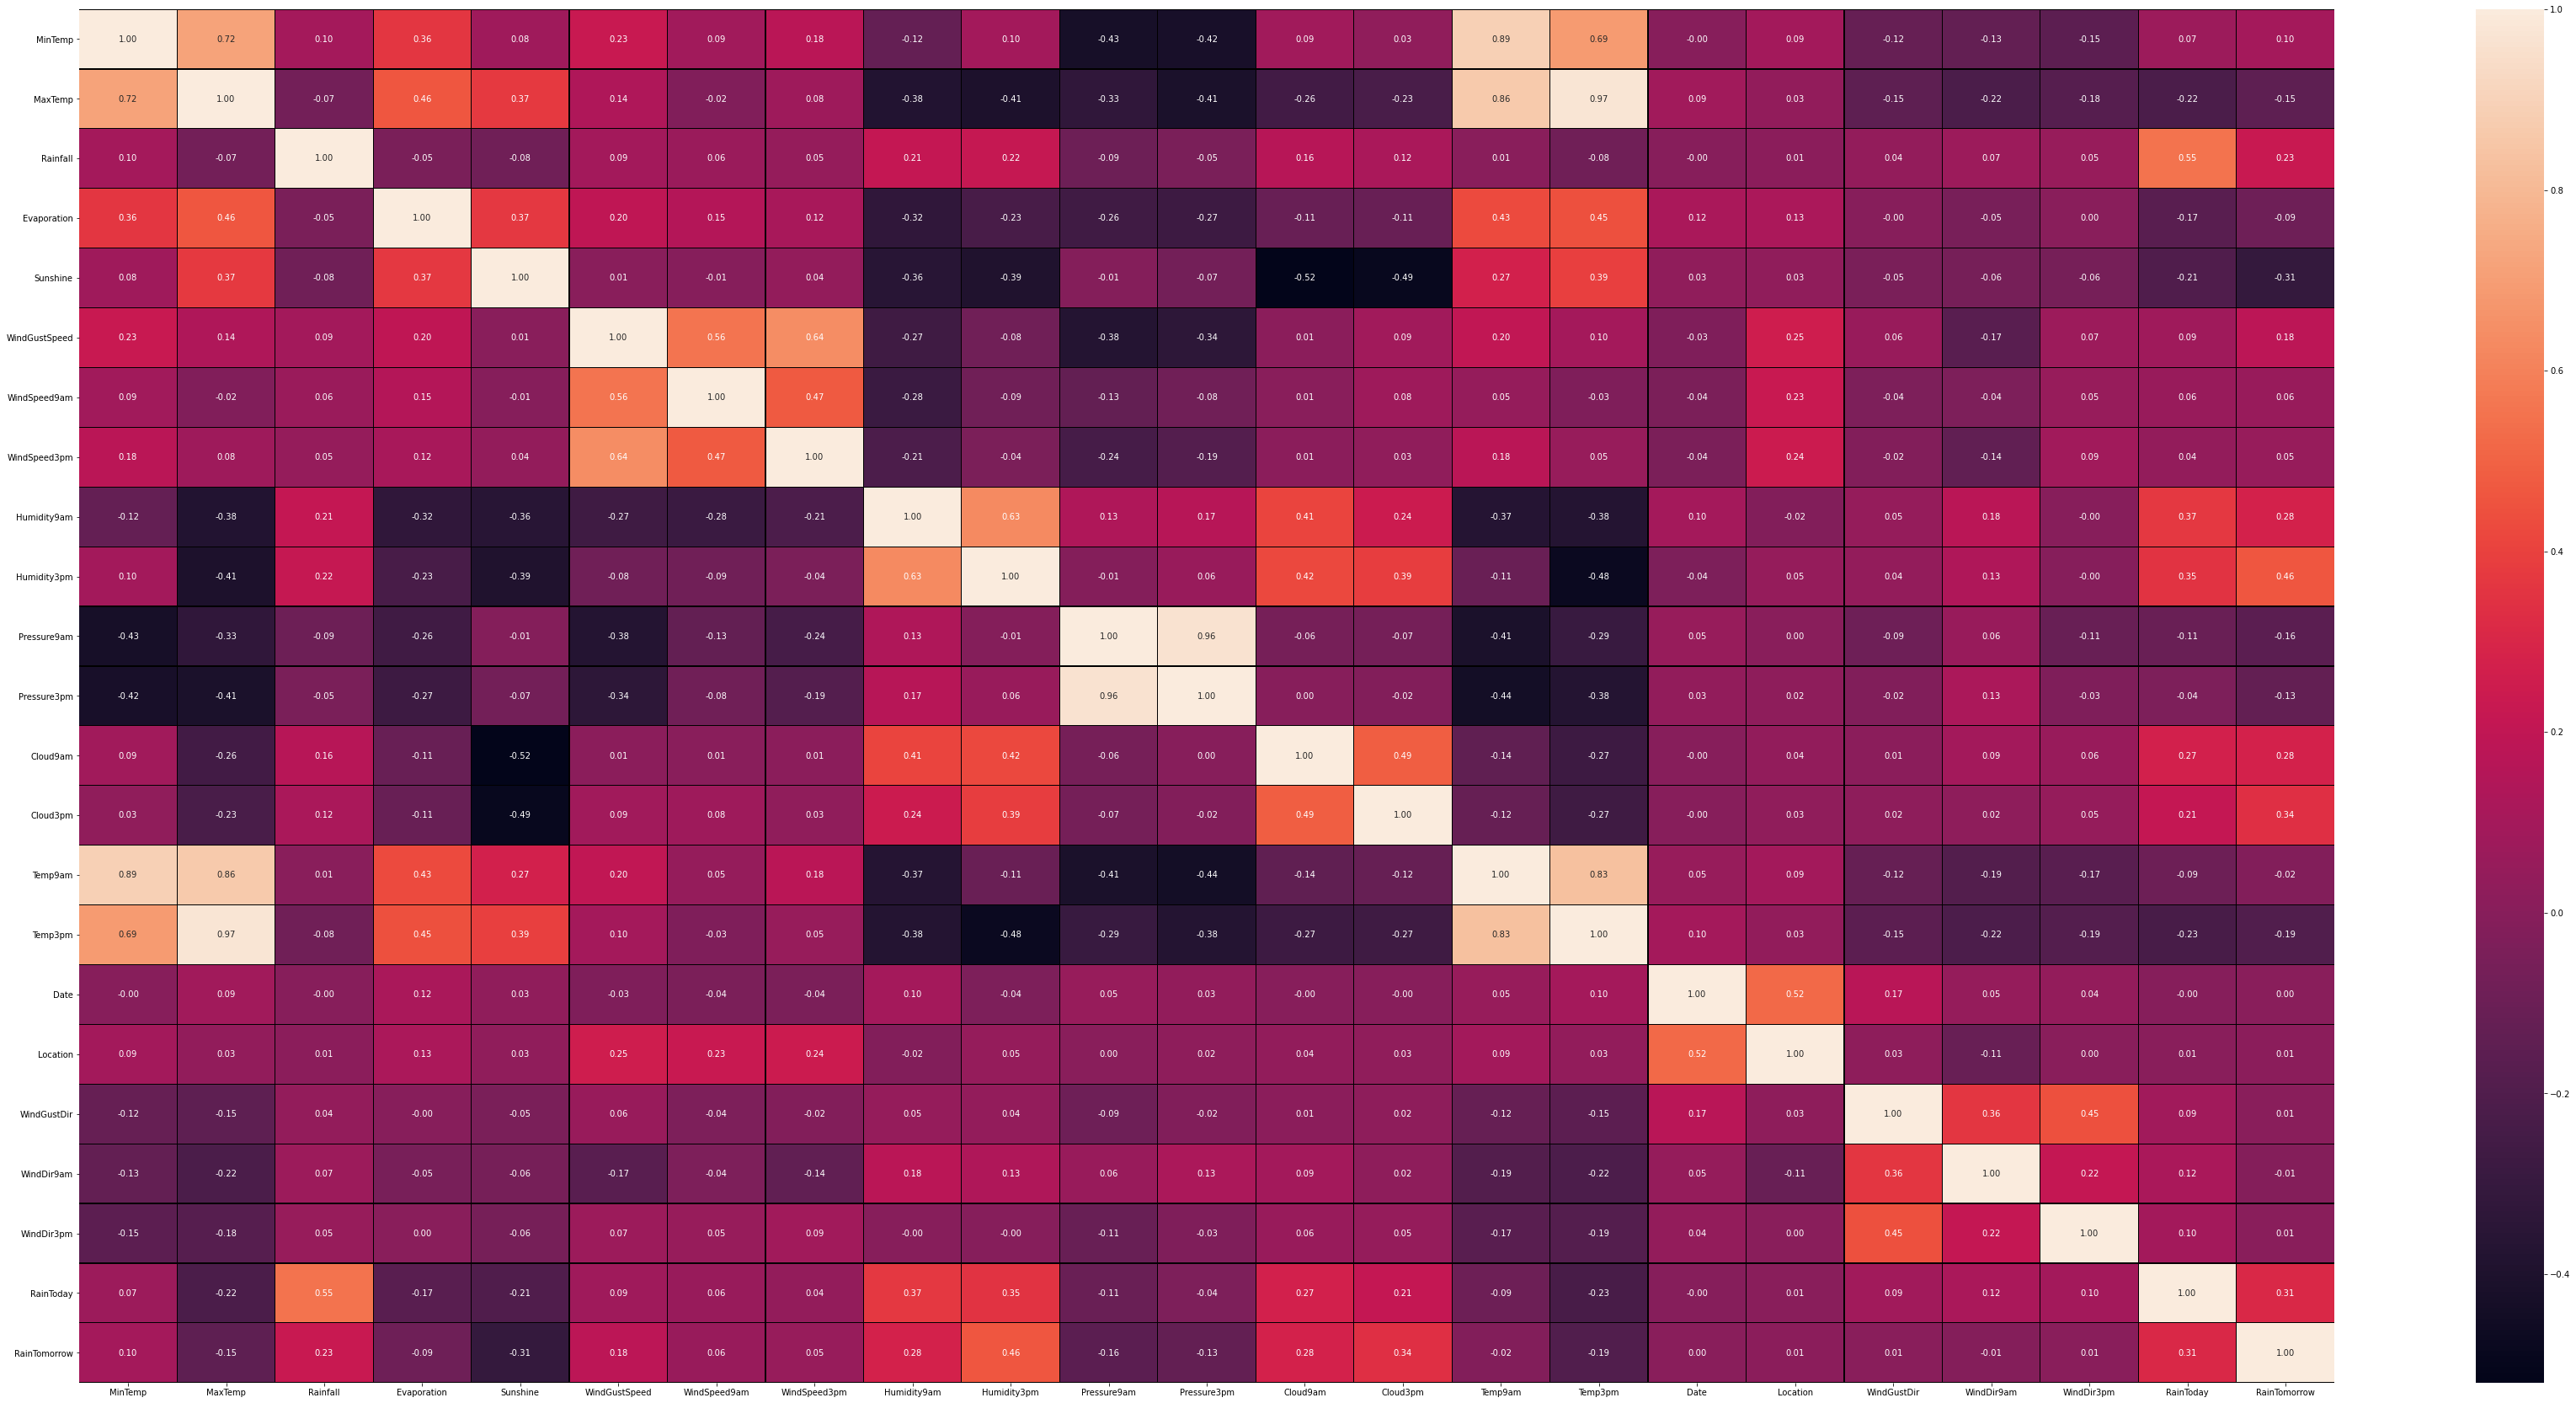

In [80]:
#heat map
plt.figure(figsize=(60,30))
sns.heatmap(data.corr(),annot=True,linewidths=0.2,linecolor='black',fmt='0.2f')

it show the correlation of each column with its own and also with target variable

In [81]:
data.shape

(7613, 23)

lets will check the outliers present in the various column

MinTemp             AxesSubplot(0.125,0.799681;0.227941x0.0803191)
MaxTemp          AxesSubplot(0.398529,0.799681;0.227941x0.0803191)
Rainfall         AxesSubplot(0.672059,0.799681;0.227941x0.0803191)
Evaporation         AxesSubplot(0.125,0.703298;0.227941x0.0803191)
Sunshine         AxesSubplot(0.398529,0.703298;0.227941x0.0803191)
WindGustSpeed    AxesSubplot(0.672059,0.703298;0.227941x0.0803191)
WindSpeed9am        AxesSubplot(0.125,0.606915;0.227941x0.0803191)
WindSpeed3pm     AxesSubplot(0.398529,0.606915;0.227941x0.0803191)
Humidity9am      AxesSubplot(0.672059,0.606915;0.227941x0.0803191)
Humidity3pm         AxesSubplot(0.125,0.510532;0.227941x0.0803191)
Pressure9am      AxesSubplot(0.398529,0.510532;0.227941x0.0803191)
Pressure3pm      AxesSubplot(0.672059,0.510532;0.227941x0.0803191)
Cloud9am            AxesSubplot(0.125,0.414149;0.227941x0.0803191)
Cloud3pm         AxesSubplot(0.398529,0.414149;0.227941x0.0803191)
Temp9am          AxesSubplot(0.672059,0.414149;0.227941x0.0803

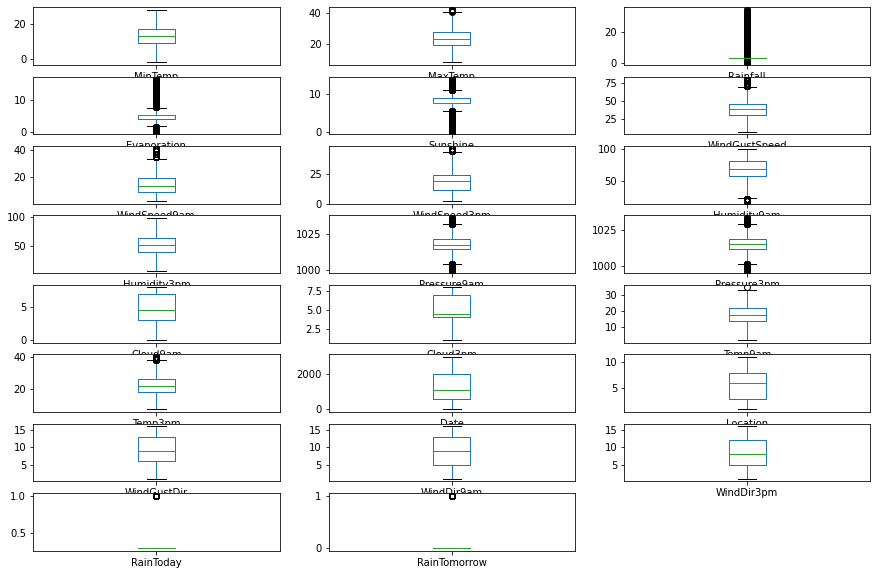

In [82]:
#plotting the boxplot of each column to check the outliers 
data.plot(kind='box',subplots = True,layout=(8,3),figsize = (15,10))

some of column contain outliers 

In [83]:
data.skew()

MinTemp         -0.068122
MaxTemp          0.316630
Rainfall         3.795903
Evaporation      0.839816
Sunshine        -0.585009
WindGustSpeed    0.521237
WindSpeed9am     0.797368
WindSpeed3pm     0.410050
Humidity9am     -0.232404
Humidity3pm      0.126419
Pressure9am      0.025414
Pressure3pm      0.052279
Cloud9am        -0.338874
Cloud3pm        -0.207540
Temp9am         -0.035768
Temp3pm          0.330556
Date             0.391442
Location        -0.023000
WindGustDir     -0.197473
WindDir9am      -0.079394
WindDir3pm      -0.037433
RainToday        1.258074
RainTomorrow     1.284297
dtype: float64

it is necesarry to remove skewness 

In [84]:
#calculate the zscore
z = np.abs(zscore(data))
print(z)

[[0.06601011 0.14664806 0.74076186 ... 1.28892416 0.55241316 0.54633507]
 [1.04170785 0.22075636 0.22268791 ... 1.52376516 0.55241316 0.54633507]
 [0.02629972 0.32095757 0.22268791 ... 1.52376516 0.55241316 0.54633507]
 ...
 [1.74326256 0.25415676 0.22268791 ... 1.29432682 0.55241316 0.54633507]
 [1.41094717 0.52135998 0.22268791 ... 1.28892416 0.55241316 0.54633507]
 [0.96785999 0.53806018 0.22268791 ... 1.29432682 0.55241316 0.54633507]]


In [85]:
threshold=3
print(np.where(z<3))
print(data.shape)

(array([   0,    0,    0, ..., 7612, 7612, 7612], dtype=int64), array([ 0,  1,  2, ..., 20, 21, 22], dtype=int64))
(7613, 23)


In [86]:
#Assign the value to df_new which are less the threshold value and removing the outliers
data_new=data[(z<3).all(axis = 1)]

In [87]:
print(data.shape)
print(data_new.shape)
data = data_new
print('Shape after removing outlires',data.shape)

(7613, 23)
(7125, 23)
Shape after removing outlires (7125, 23)


In [88]:
data.skew()

MinTemp         -0.052677
MaxTemp          0.277794
Rainfall         2.865601
Evaporation      0.263106
Sunshine        -0.564946
WindGustSpeed    0.407924
WindSpeed9am     0.690666
WindSpeed3pm     0.362375
Humidity9am     -0.202546
Humidity3pm      0.143114
Pressure9am      0.054530
Pressure3pm      0.060830
Cloud9am        -0.319445
Cloud3pm        -0.196123
Temp9am         -0.053621
Temp3pm          0.291961
Date             0.377132
Location        -0.015273
WindGustDir     -0.205900
WindDir9am      -0.081155
WindDir3pm      -0.023295
RainToday        1.400847
RainTomorrow     1.379552
dtype: float64

array([[<AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'Rainfall'}>],
       [<AxesSubplot:title={'center':'Evaporation'}>,
        <AxesSubplot:title={'center':'Sunshine'}>,
        <AxesSubplot:title={'center':'WindGustSpeed'}>],
       [<AxesSubplot:title={'center':'WindSpeed9am'}>,
        <AxesSubplot:title={'center':'WindSpeed3pm'}>,
        <AxesSubplot:title={'center':'Humidity9am'}>],
       [<AxesSubplot:title={'center':'Humidity3pm'}>,
        <AxesSubplot:title={'center':'Pressure9am'}>,
        <AxesSubplot:title={'center':'Pressure3pm'}>],
       [<AxesSubplot:title={'center':'Cloud9am'}>,
        <AxesSubplot:title={'center':'Cloud3pm'}>,
        <AxesSubplot:title={'center':'Temp9am'}>],
       [<AxesSubplot:title={'center':'Temp3pm'}>,
        <AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Location'}>],
       [<AxesSubplot:title={'center':'WindGustDir'}>,
  

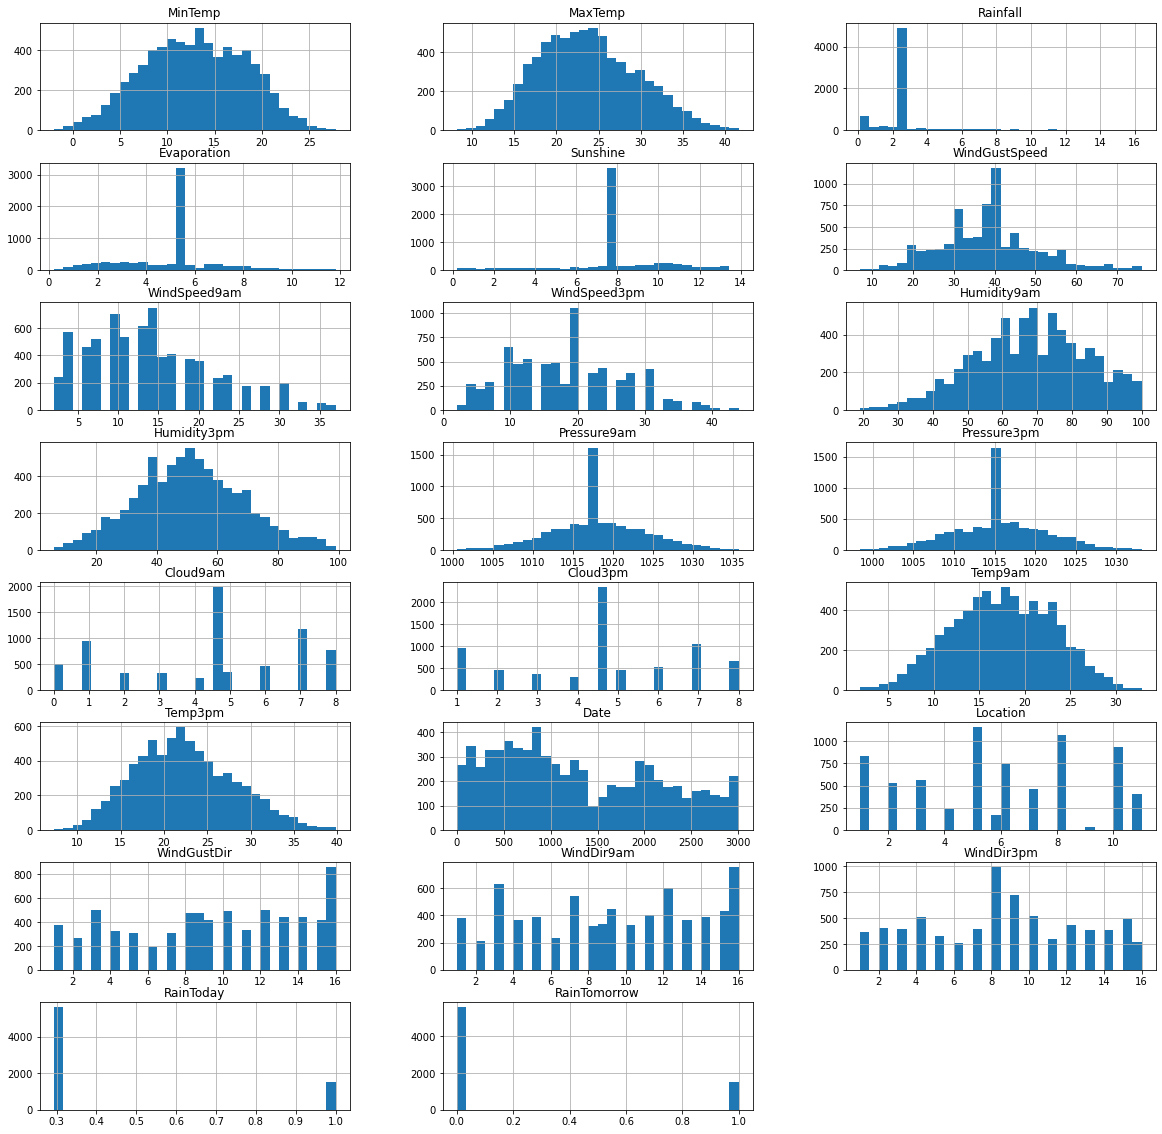

In [89]:
#plotting histogram for univariate analysis and checking the Normal Distribution
data.hist(figsize=(20,20), grid = True, layout = (8,3), bins = 30)

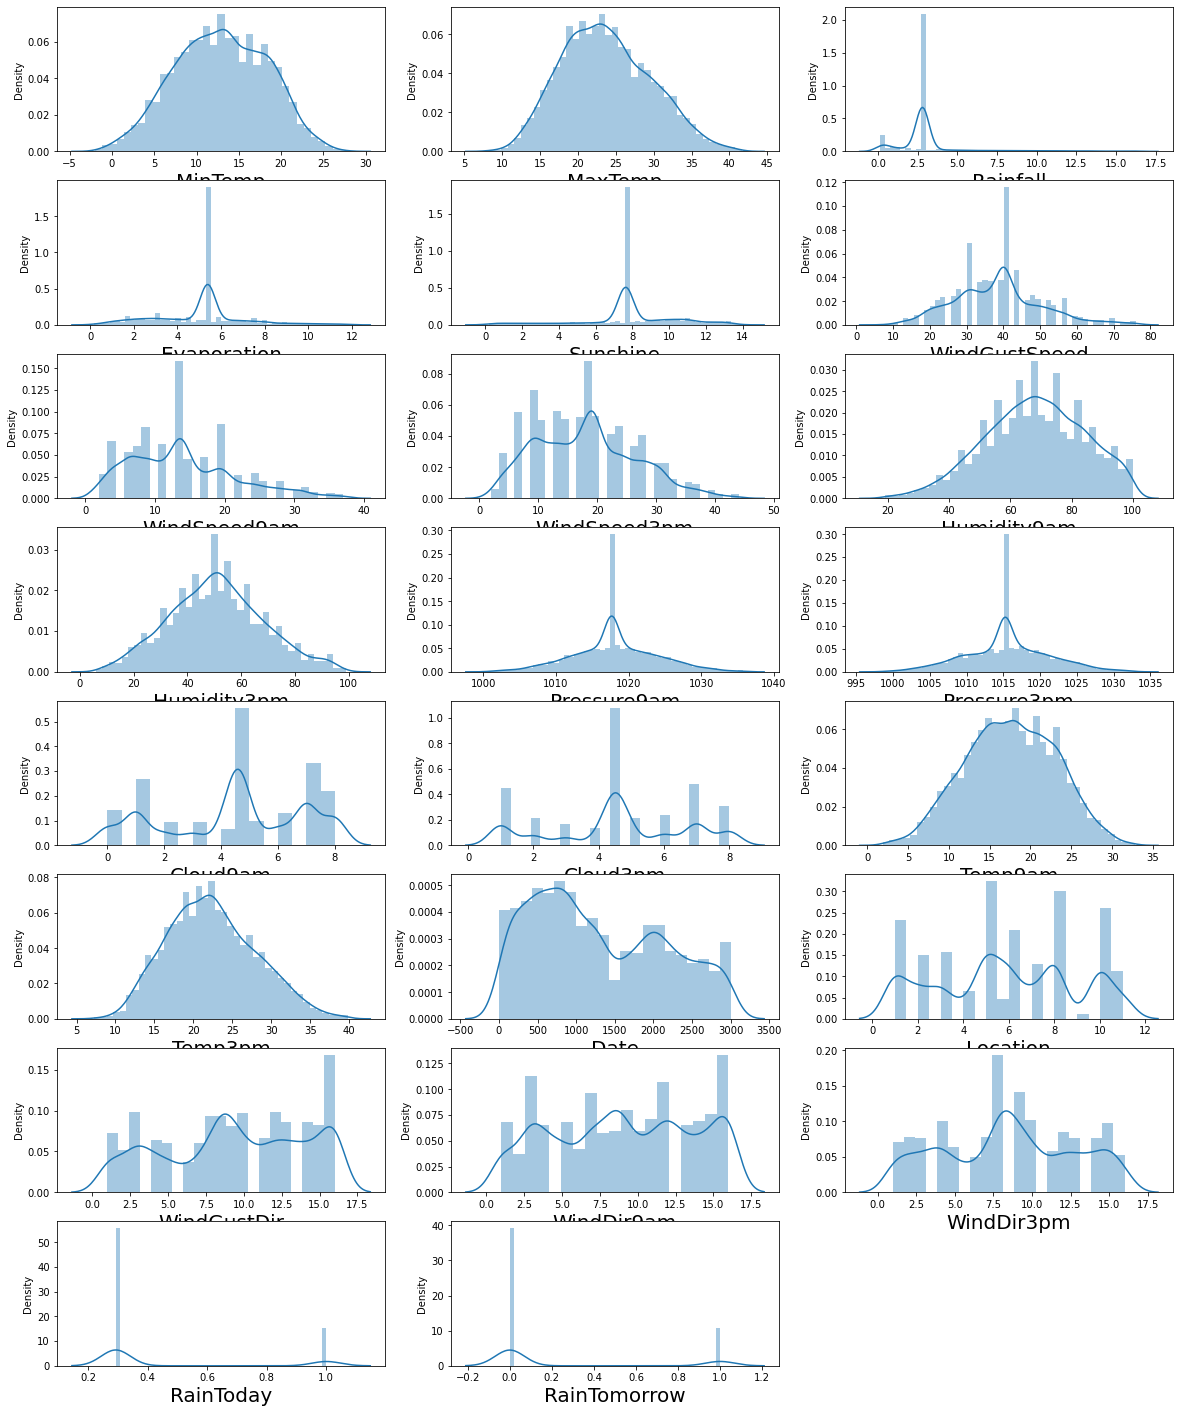

In [90]:
#now lets see how data is distributed in each column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=23:
        ax=plt.subplot(8,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    

it shows the distribution of data 

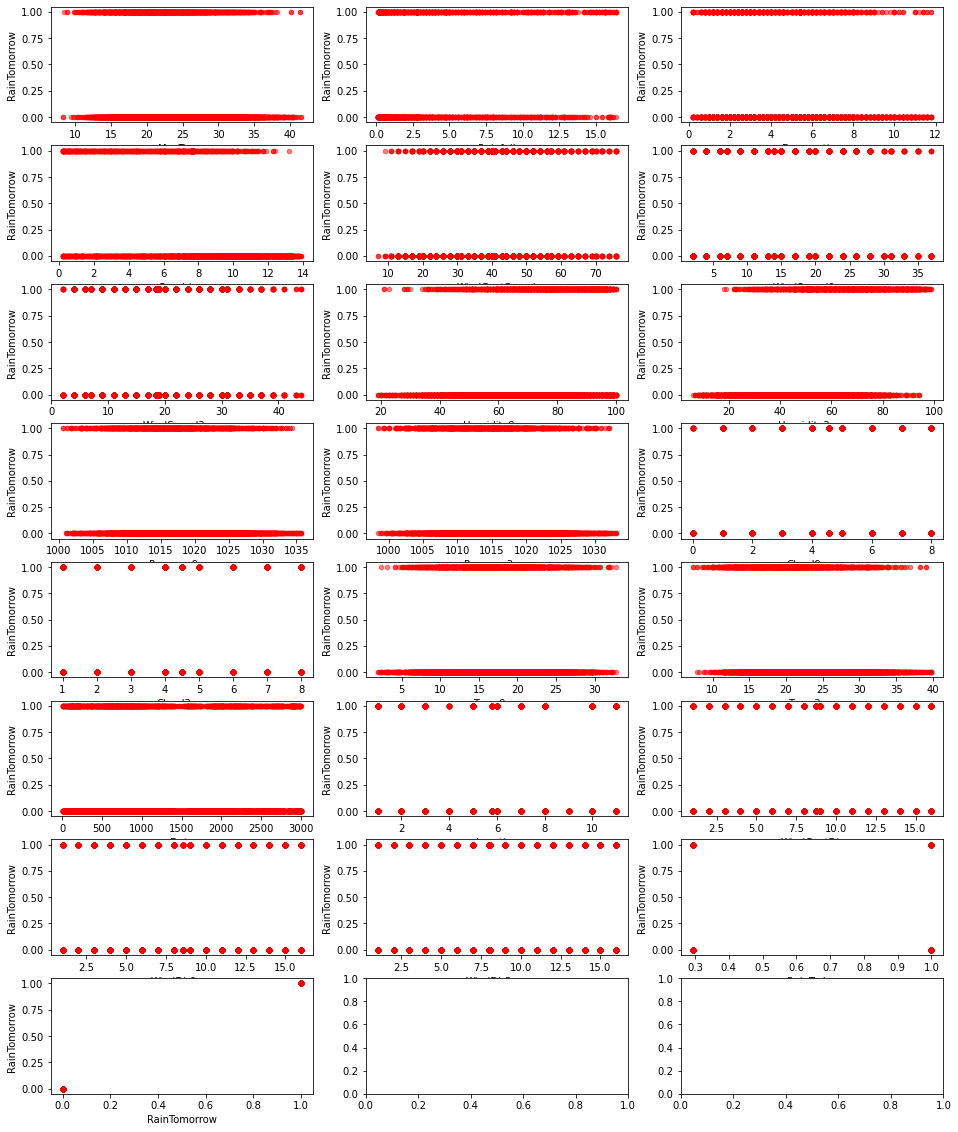

In [91]:
# setup figure
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(16, 20))

# iterate and plot subplots
for xcol, ax in zip(data.columns[1:], [x for v in axes for x in v]):
    data.plot.scatter(x=xcol, y='RainTomorrow', ax=ax, alpha=0.5, color='r')


scatter plot shows how the data is distributed with respective output variable

In [92]:
#assign the value of x and y for training and testing phase
x = data.drop(columns=['RainTomorrow'])
y = data[["RainTomorrow"]]
print(x.shape)
print(y.shape)

(7125, 21)
(7125, 1)


In [93]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(x,columns=x.columns)

In [94]:
from sklearn.preprocessing import StandardScaler

In [95]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)
x_scaled

array([[ 9.40107441e-02, -1.43953980e-01, -1.04226231e+00, ...,
         7.85494693e-01,  8.58145543e-01,  1.29157929e+00],
       [-1.01626407e+00,  2.31241633e-01, -1.47075070e-01, ...,
         1.00207747e+00, -6.54067668e-01,  1.52566310e+00],
       [ 1.48784275e-03,  3.33567709e-01, -1.47075070e-01, ...,
         1.21866025e+00,  8.58145543e-01,  1.52566310e+00],
       ...,
       [-1.71943812e+00,  2.65350325e-01, -1.47075070e-01, ...,
        -7.30584762e-01, -5.97629162e-03, -1.28334261e+00],
       [-1.38635568e+00,  5.38219861e-01, -1.47075070e-01, ...,
        -1.38033310e+00, -5.97629162e-03,  1.29157929e+00],
       [-9.42245751e-01,  5.55274207e-01, -1.47075070e-01, ...,
        -8.08364243e-02,  2.10054167e-01, -1.28334261e+00]])

In [96]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score

In [97]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set 

model = [DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_r2_score = 0
for r_state in range(40,90):
    train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = r_state,test_size = 0.33)
    for i in model:
        i.fit(train_x,train_y)
        pre = i.predict(test_x)
        r2_sc = r2_score(test_y,pre)
        print("R2 score correspond to random state " ,r_state ,"is", r2_sc)
        if r2_sc> max_r2_score:
            max_r2_score=r2_sc
            final_state = r_state
            final_model = i
            
print()
print()
print()
print()
print("max R2 score correspond to random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)
        

R2 score correspond to random state  40 is 1.0
R2 score correspond to random state  40 is 0.2018445448696652
R2 score correspond to random state  40 is 1.0
R2 score correspond to random state  40 is 0.4283321436083851
R2 score correspond to random state  40 is 0.9999999992937629
R2 score correspond to random state  41 is 1.0
R2 score correspond to random state  41 is 0.1920269360269361
R2 score correspond to random state  41 is 1.0
R2 score correspond to random state  41 is 0.42517818208037117
R2 score correspond to random state  41 is 0.9999999992916929
R2 score correspond to random state  42 is 1.0
R2 score correspond to random state  42 is 0.2295957158249664
R2 score correspond to random state  42 is 1.0
R2 score correspond to random state  42 is 0.4112484204328958
R2 score correspond to random state  42 is 0.9999999992944706
R2 score correspond to random state  43 is 1.0
R2 score correspond to random state  43 is 0.20022148493143355
R2 score correspond to random state  43 is 1.0
R2

we have used various alogorith among that it is found that DecisionTreeRegressor with random state of 40 is having maximum accuracy so lets select that model

In [98]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)
x_scaled

array([[ 9.40107441e-02, -1.43953980e-01, -1.04226231e+00, ...,
         7.85494693e-01,  8.58145543e-01,  1.29157929e+00],
       [-1.01626407e+00,  2.31241633e-01, -1.47075070e-01, ...,
         1.00207747e+00, -6.54067668e-01,  1.52566310e+00],
       [ 1.48784275e-03,  3.33567709e-01, -1.47075070e-01, ...,
         1.21866025e+00,  8.58145543e-01,  1.52566310e+00],
       ...,
       [-1.71943812e+00,  2.65350325e-01, -1.47075070e-01, ...,
        -7.30584762e-01, -5.97629162e-03, -1.28334261e+00],
       [-1.38635568e+00,  5.38219861e-01, -1.47075070e-01, ...,
        -1.38033310e+00, -5.97629162e-03,  1.29157929e+00],
       [-9.42245751e-01,  5.55274207e-01, -1.47075070e-01, ...,
        -8.08364243e-02,  2.10054167e-01, -1.28334261e+00]])

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.33,random_state=40)

In [100]:
dt=DecisionTreeRegressor()

In [101]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [102]:
pred_test=dt.predict(x_test)
print(r2_score(y_test,pred_test))

1.0


# cross validation

In [103]:
from sklearn.model_selection import cross_val_score


In [104]:
for i in range(2,10):
    cv=cross_val_score(dt,x,y,cv=i)
    print(dt,cv.mean())

DecisionTreeRegressor() 0.9983401349135361
DecisionTreeRegressor() 0.9984610649430593
DecisionTreeRegressor() 0.998387943519189
DecisionTreeRegressor() 1.0
DecisionTreeRegressor() 0.998385334268426
DecisionTreeRegressor() 1.0
DecisionTreeRegressor() 0.9983766233766234
DecisionTreeRegressor() 1.0


In [105]:
#lets plot and visualize
y_pred=dt.predict(x_test)
y_pred

array([0.29317507, 0.29317507, 0.29317507, ..., 1.        , 0.29317507,
       0.29317507])

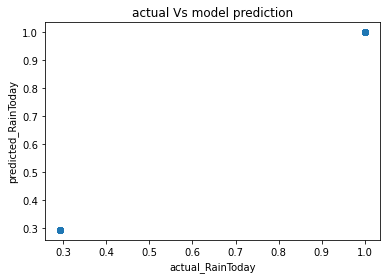

In [106]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual_RainToday')
plt.ylabel('predicted_RainToday')
plt.title('actual Vs model prediction')
plt.show()

graph show the actual vs predicted result

# saving model

In [108]:
import joblib

In [109]:
joblib.dump(dt,'Rainfall Prediction')

['Rainfall Prediction']

sucessfully we have saved the model

# conclusion

In [110]:
loaded_model=joblib.load('Rainfall Prediction')
result=loaded_model.score(x_test,y_test)
print(result)

1.0


so this our final target we have sucessfully saved the model and also tested